In [0]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from keras.optimizers import SGD, Adam, Adamax
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
from keras import metrics
import matplotlib.pyplot as plt


In [0]:
dataset=pd.read_csv('drive/My Drive/Python_ICP/insurance.csv')
le = LabelEncoder()
dataset['region'] = le.fit_transform(dataset['region'].astype('str'))
dataset['sex'] = le.fit_transform(dataset['sex'].astype('str'))
dataset['smoker'] = le.fit_transform(dataset['smoker'].astype('str'))

print(dataset.head())
# dataset = dataset.values
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:6]
Y = dataset.iloc[:,6]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25, random_state=100)

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [0]:
# HyperParameters1
activation_function="tanh"
learning_rate=0.1
epochs=50
b_size=32
decay_rate= learning_rate / epochs
adam= Adam(lr=learning_rate, decay=decay_rate)

In [0]:
# HyperParameters2
activation_function="relu"
learning_rate=0.3
epochs=100
b_size=32
decay_rate= learning_rate / epochs
sgd= SGD(lr=learning_rate, decay=decay_rate)

In [0]:
#Define the model

model = Sequential()
model.add(Dense(50, input_dim = 6, activation=activation_function))
model.add(Dropout(0.1))
model.add(Dense(20, activation=activation_function))
model.add(Dense(10, activation=activation_function))
model.add(Dense(1,input_dim = 6, activation=activation_function))
  
model.compile(optimizer = "Adamax", loss = 'mean_squared_error', metrics = [metrics.mae])
tbCallBack = TensorBoard(log_dir='./Graph1', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=b_size,callbacks=[tbCallBack])

Train on 1003 samples, validate on 335 samples
Epoch 1/100
1003/1003 [==============================] - 0s 210us/step - loss: 316610080.7657 - mean_absolute_error: 13057.0604 - val_loss: 338641518.6149 - val_mean_absolute_error: 13836.8588
Epoch 2/100
1003/1003 [==============================] - 0s 45us/step - loss: 315461227.4696 - mean_absolute_error: 13017.0184 - val_loss: 336822773.4925 - val_mean_absolute_error: 13774.6826
Epoch 3/100
1003/1003 [==============================] - 0s 52us/step - loss: 313087823.9362 - mean_absolute_error: 12931.3061 - val_loss: 333350017.2418 - val_mean_absolute_error: 13655.1031
Epoch 4/100
1003/1003 [==============================] - 0s 48us/step - loss: 308323391.6171 - mean_absolute_error: 12758.6714 - val_loss: 326355663.4746 - val_mean_absolute_error: 13410.9571
Epoch 5/100
1003/1003 [==============================] - 0s 51us/step - loss: 299341066.1456 - mean_absolute_error: 12429.2498 - val_loss: 314154357.4925 - val_mean_absolute_error: 129

In [0]:
# Final evaluation of the model
mae, loss= model.evaluate(X_test, Y_test, verbose=0)
print(mae, loss)

339499822.80597013 13866.023011893656


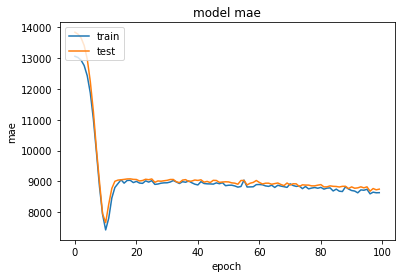

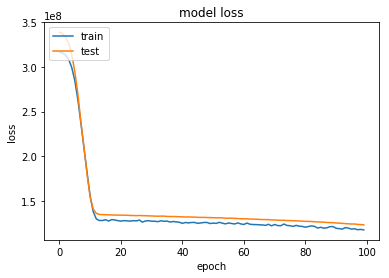

In [0]:
# accuracy history
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
%load_ext tensorboard
%tensorboard --logdir Graph1